In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

dataset = MNIST(root='./data', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [2]:
test_dataset = MNIST(root='./data', train=False)

In [3]:
print(len(dataset))
print(len(test_dataset))

60000
10000


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


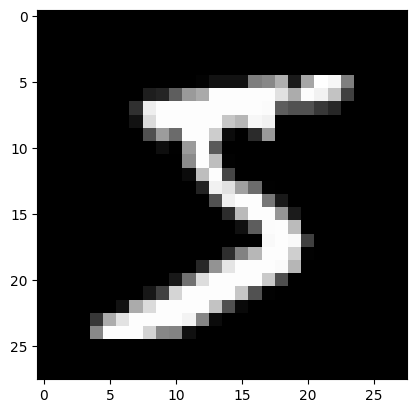

In [6]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [7]:
import torchvision.transforms as transforms

dataset = MNIST(root='./data',
                train=True,
                transform = transforms.ToTensor())          ## image를 tensor로

img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [8]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])

In [9]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

# train

In [10]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [14]:
import torch.nn.functional as F

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [24]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [45]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [27]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                      # prediction 생성
        loss = F.cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss, 'val_acc': acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

In [28]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9615, val_acc: 0.6162
Epoch [1], val_loss: 1.6899, val_acc: 0.7285
Epoch [2], val_loss: 1.4863, val_acc: 0.7632
Epoch [3], val_loss: 1.3322, val_acc: 0.7813
Epoch [4], val_loss: 1.2136, val_acc: 0.7968


In [29]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1204, val_acc: 0.8079
Epoch [1], val_loss: 1.0457, val_acc: 0.8151
Epoch [2], val_loss: 0.9846, val_acc: 0.8212
Epoch [3], val_loss: 0.9339, val_acc: 0.8254
Epoch [4], val_loss: 0.8910, val_acc: 0.8293


In [30]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8542, val_acc: 0.8335
Epoch [1], val_loss: 0.8225, val_acc: 0.8354
Epoch [2], val_loss: 0.7947, val_acc: 0.8381
Epoch [3], val_loss: 0.7701, val_acc: 0.8409
Epoch [4], val_loss: 0.7483, val_acc: 0.8432


In [31]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7287, val_acc: 0.8453
Epoch [1], val_loss: 0.7111, val_acc: 0.8476
Epoch [2], val_loss: 0.6951, val_acc: 0.8502
Epoch [3], val_loss: 0.6804, val_acc: 0.8524
Epoch [4], val_loss: 0.6671, val_acc: 0.8544


Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

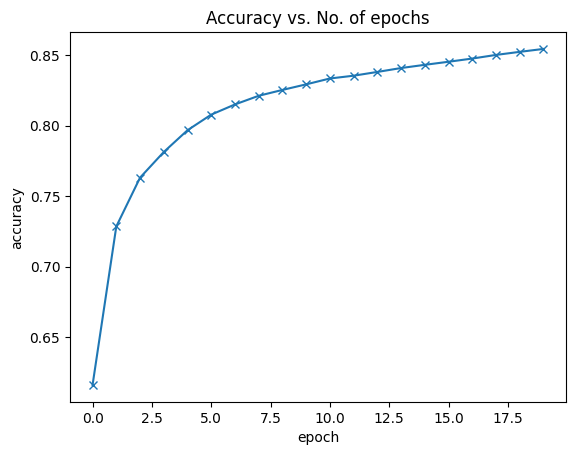

In [33]:
history = history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')

# Test

In [41]:
test_dataset = MNIST(root='./data',
                     train=False,
                     transform=transforms.ToTensor())

In [42]:
img, label = test_dataset[0]
print('Label:', label)

Label: 7


In [43]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

In [44]:
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 7 , Predicted: 7


In [46]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6404603123664856, 'val_acc': 0.8604491949081421}

# Saving and loading the model

In [48]:
torch.save(model.state_dict(), './path/mnist-logistic.pth')
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0240,  0.0316, -0.0228,  ...,  0.0263, -0.0003,  0.0241],
                      [ 0.0264, -0.0202, -0.0066,  ...,  0.0028,  0.0321, -0.0244],
                      [ 0.0174,  0.0058, -0.0116,  ..., -0.0088, -0.0263, -0.0025],
                      ...,
                      [-0.0029,  0.0276,  0.0353,  ..., -0.0015,  0.0161, -0.0236],
                      [ 0.0210,  0.0153, -0.0341,  ..., -0.0351,  0.0299, -0.0003],
                      [-0.0344, -0.0214,  0.0293,  ...,  0.0040, -0.0345,  0.0285]])),
             ('linear.bias',
              tensor([-0.0208,  0.0982, -0.0200, -0.0195,  0.0140,  0.0583, -0.0038,  0.0690,
                      -0.0982, -0.0120]))])

In [49]:
model2 = MnistModel()
model2.load_state_dict(torch.load('./path/mnist-logistic.pth'))

result = evaluate(model2, test_loader)
result

{'val_loss': 0.6404603123664856, 'val_acc': 0.8604491949081421}